In [1]:
import numpy as np

emode = np.loadtxt('./data/template_eigenmodes/fsLR_32k_midthickness-lh_emode_200.txt')
print(emode.shape)

(32492, 200)


# 可视化所有 geometry mode from Nature2023

In [ ]:
from brainspace.plotting import plot_hemispheres
from brainspace.datasets import load_conte69
from brainspace.mesh.mesh_io import read_surface
import nibabel as nib
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

import os
from tqdm import tqdm
import IPython
from IPython.core.display import Image as image
from PIL import Image

surf_lh, surf_rh = load_conte69()
surf_lh2 = read_surface('/Users/deyingli/Documents/code/Grad_2022/data_tmp/support_data/human/S1200.L.midthickness_MSMAll.32k_fs_LR.surf.gii')
surf_rh2 = read_surface('/Users/deyingli/Documents/code/Grad_2022/data_tmp/support_data/human/S1200.R.midthickness_MSMAll.32k_fs_LR.surf.gii')

hroi_L = nib.load('/Users/deyingli/Documents/code/Grad_2022/data_tmp/support_data/100307.L.atlasroi.32k_fs_LR.shape.gii')
index_L = hroi_L.agg_data()
hroi_R = nib.load('/Users/deyingli/Documents/code/Grad_2022/data_tmp/support_data/100307.R.atlasroi.32k_fs_LR.shape.gii')
index_R = hroi_R.agg_data()

emode_L = np.loadtxt('./data/template_eigenmodes/fsLR_32k_midthickness-lh_emode_200.txt')
emode_R = np.loadtxt('./data/template_eigenmodes/fsLR_32k_midthickness-rh_emode_200.txt')

for modei in tqdm(range(200)):
    # print(f'mode{modei}')
    data_L = np.squeeze(emode_L[:, modei]) # (32492,)
    data_R = np.squeeze(emode_R[:, modei]) # (32492,)
    data_L[index_L==0] = np.nan
    data_R[index_R==0] = np.nan
    data = np.concatenate((data_L, data_R), axis=0)

    obj = plot_hemispheres(surf_lh2, surf_rh2, data, color_bar=True, label_text=[f'mode{modei+1}'], nan_color=(0.6,0.6,0.6,1), background=(1,1,1), embed_nb=True, cmap='coolwarm', transparent_bg=True, size=(2000,500)) # viridis
    with open(os.path.join(f'/Users/deyingli/Documents/code/BrainEigenmodes/figures/geometry_mode{modei+1}.png'), 'wb') as png:
        png.write(obj.data)

# 读取 nature 公开的 task z值

In [8]:
from brainspace.plotting import plot_hemispheres
from brainspace.datasets import load_conte69
from brainspace.mesh.mesh_io import read_surface
import nibabel as nib
import numpy as np
import h5py
from matplotlib.colors import LinearSegmentedColormap

import os
from tqdm import tqdm
import IPython
from IPython.core.display import Image as image
from PIL import Image

surf_lh, surf_rh = load_conte69()
surf_lh2 = read_surface('/Users/deyingli/Documents/code/Grad_2022/data_tmp/support_data/human/S1200.L.midthickness_MSMAll.32k_fs_LR.surf.gii')
surf_rh2 = read_surface('/Users/deyingli/Documents/code/Grad_2022/data_tmp/support_data/human/S1200.R.midthickness_MSMAll.32k_fs_LR.surf.gii')

hroi_L = nib.load('/Users/deyingli/Documents/code/Grad_2022/data_tmp/support_data/100307.L.atlasroi.32k_fs_LR.shape.gii')
index_L = hroi_L.agg_data()
hroi_R = nib.load('/Users/deyingli/Documents/code/Grad_2022/data_tmp/support_data/100307.R.atlasroi.32k_fs_LR.shape.gii')
index_R = hroi_R.agg_data()

emode_L = np.loadtxt('./data/template_eigenmodes/fsLR_32k_midthickness-lh_emode_200.txt')
emode_R = np.loadtxt('./data/template_eigenmodes/fsLR_32k_midthickness-rh_emode_200.txt')

y = h5py.File('./data/examples/subject_tfMRI_zstat-lh.mat')
y = np.squeeze(y['zstat']) # (32492,)
y[index_L==0] = np.nan
data = np.concatenate((y, np.zeros(32492)), axis=0)

obj = plot_hemispheres(surf_lh2, surf_rh2, data, color_bar=True, label_text=['subject_tfMRI_zstat-lh'], nan_color=(0.6,0.6,0.6,1), background=(1,1,1), embed_nb=True, cmap='seismic', transparent_bg=True, size=(2000,500)) # viridis
with open(os.path.join(f'/Users/deyingli/Documents/code/BrainEigenmodes/figures/subject_tfMRI_zstat-lh.png'), 'wb') as png:
    png.write(obj.data)

/Users/deyingli/miniconda3/envs/pytorch/lib/python3.8/site-packages/brainspace-0.1.3-py3.8.egg/brainspace/plotting/surface_plotting.py:427: RuntimeWarning: Running plot_hemispheres without a display may result in a crash. For a workaround please consult https://github.com/MICA-MNI/BrainSpace/issues/66. To suppress this warning set suppress_warnings=True.
  warnings.warn(
/Users/deyingli/miniconda3/envs/pytorch/lib/python3.8/site-packages/brainspace-0.1.3-py3.8.egg/brainspace/plotting/base.py:292: UserWarning: Support for interactive mode is only provided for a single renderer: 'nrow=1' and 'ncol=1'. Setting 'interactive=False'
  warnings.warn("Support for interactive mode is only provided for "


(29696, 200) (29696, 1)
the accuracy: 0.6415398834634366


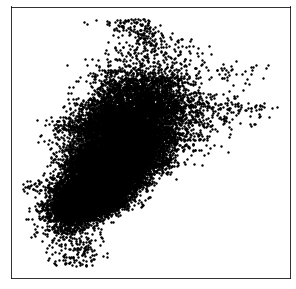

In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

x = np.loadtxt('./data/template_eigenmodes/fsLR_32k_midthickness-lh_emode_200.txt') # (32492, 200)

y = h5py.File('./data/examples/subject_tfMRI_zstat-lh.mat')
y = np.squeeze(y['zstat'])[:, np.newaxis] # (32492,1)

# remove the medial wall
dirc_L = '/Users/deyingli/Documents/code/Atlas/metric_index_L.txt'
select_ind_L = np.loadtxt( dirc_L ).astype(int)
dirc_R = '/Users/deyingli/Documents/code/Atlas/metric_index_R.txt'
select_ind_R = np.loadtxt( dirc_R ).astype(int)

x = x[select_ind_L,:]
y = y[select_ind_L,:]
print(x.shape, y.shape)

# GLM model
result = np.zeros((y.shape[1], x.shape[1]))
for v in range(x.shape[1]):
    if v==0:
        continue
    if np.sum(x[:,v])==0:
        result[:,v] = result[:,v-1]
    else:
        glm = sm.GLM(x[:,v], y)
        glm_results = glm.fit()
        result[:,v] = glm_results.params

# check the results
print(f'the accuracy: {np.corrcoef(np.squeeze(y), np.squeeze(np.dot(x,result.T)))[0,1]}')

plt.subplots(figsize = (5, 5))
plt.scatter(np.squeeze(y),np.squeeze(np.dot(x,result.T)), c='black', s=2)
plt.xticks([])
plt.yticks([])
plt.show()

# 使用 mode 对高斯分布噪声进行拟合：无法拟合

(29696, 1000) (29696, 1)
the accuracy: 0.1713054164208387


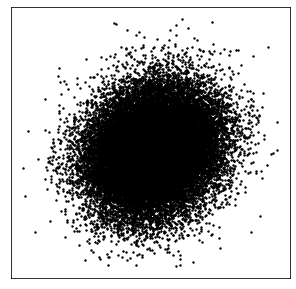

In [15]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

x = np.loadtxt('./data/template_eigenmodes/fsLR_32k_midthickness-lh_emode_1000.txt') # (32492, 200)

y = np.random.randn(32492)
y = y[:, np.newaxis] # (32492,1)

# remove the medial wall
dirc_L = '/Users/deyingli/Documents/code/Atlas/metric_index_L.txt'
select_ind_L = np.loadtxt( dirc_L ).astype(int)
dirc_R = '/Users/deyingli/Documents/code/Atlas/metric_index_R.txt'
select_ind_R = np.loadtxt( dirc_R ).astype(int)

x = x[select_ind_L,:]
y = y[select_ind_L,:]
print(x.shape, y.shape)

# GLM model
result = np.zeros((y.shape[1], x.shape[1]))
for v in range(x.shape[1]):
    if v==0:
        continue
    if np.sum(x[:,v])==0:
        result[:,v] = result[:,v-1]
    else:
        glm = sm.GLM(x[:,v], y)
        glm_results = glm.fit()
        result[:,v] = glm_results.params

# check the results
print(f'the accuracy: {np.corrcoef(np.squeeze(y), np.squeeze(np.dot(x,result.T)))[0,1]}')

plt.subplots(figsize = (5, 5))
plt.scatter(np.squeeze(y),np.squeeze(np.dot(x,result.T)), c='black', s=2)
plt.xticks([])
plt.yticks([])
plt.show()

# spin test：vertex

In [6]:
from brainsmash.mapgen.sampled import Sampled
from brainsmash.mapgen.memmap import txt2memmap

Sur_num = 1000

Sur_father = './data/spin_test'
dist_mat_fin = f'{Sur_father}/LeftDenseGeodesicDistmat.txt'
output_files = txt2memmap(dist_mat_fin, Sur_father, maskfile=None, delimiter=' ')
output_files = {'distmat': f'{Sur_father}/distmat.npy',
                'index': f'{Sur_father}/index.npy'}
# distmat: (32492, 32492) index: (32492, 32492)

# 读取 tfmri map 数据
_ = h5py.File('./data/examples/subject_tfMRI_zstat-lh.mat')
_ = np.squeeze(_['zstat']) # (32492,)
tfmri_map = np.zeros(32492)
tfmri_map[select_ind_L] = _[select_ind_L]
np.savetxt(f'{Sur_father}/subject_tfMRI_zstat-lh.txt', X=tfmri_map, delimiter=' ')

brain_map_file = f'{Sur_father}/subject_tfMRI_zstat-lh.txt'
dist_mat_mmap = output_files['distmat']
index_mmap = output_files['index']
sampled = Sampled(brain_map_file, dist_mat_mmap, index_mmap)

surrogates = sampled(n=1000) # (1000, 32492)
np.save(f'{Sur_father}/subject_tfMRI_zstat_spin-lh', surrogates)

100%|██████████| 1000/1000 [29:15<00:00,  1.76s/it]


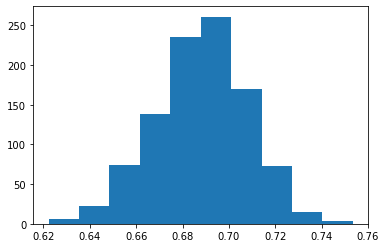

In [9]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from tqdm import tqdm

x = np.loadtxt('./data/template_eigenmodes/fsLR_32k_midthickness-lh_emode_200.txt') # (32492, 200)

y_spin = np.load('./data/spin_test/subject_tfMRI_zstat_spin-lh.npy') # (1000, 32492)

# remove the medial wall
dirc_L = '/Users/deyingli/Documents/code/Atlas/metric_index_L.txt'
select_ind_L = np.loadtxt( dirc_L ).astype(int)
dirc_R = '/Users/deyingli/Documents/code/Atlas/metric_index_R.txt'
select_ind_R = np.loadtxt( dirc_R ).astype(int)

x = x[select_ind_L,:]

corr_re = np.zeros(1000)
for ii in tqdm(range(1000)):
    y = np.squeeze(y_spin[ii,select_ind_L])[:, np.newaxis]
    # GLM model
    result = np.zeros((y.shape[1], x.shape[1]))
    for v in range(x.shape[1]):
        if v==0:
            continue
        if np.sum(x[:,v])==0:
            result[:,v] = result[:,v-1]
        else:
            glm = sm.GLM(x[:,v], y)
            glm_results = glm.fit()
            result[:,v] = glm_results.params

    # check the results
    corr_re[ii] = np.corrcoef(np.squeeze(y), np.squeeze(np.dot(x,result.T)))[0,1]
np.save('./data/spin_test/spin_1000_pearsonr', corr_re)

plt.hist(corr_re)
plt.show()

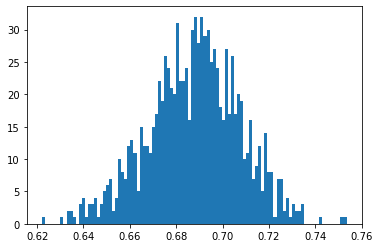

In [10]:
plt.hist(corr_re, bins=100)
plt.show()

# 在 Glasser 上计算：对公布数据进行拟合

(29696, 200) (29696, 1)


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


the accuracy: 0.8562810518273458


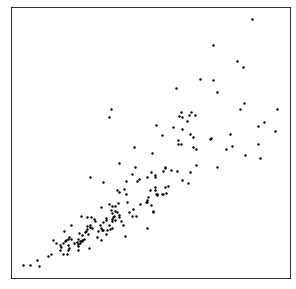

In [20]:
import h5py
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import statsmodels.api as sm

x = np.loadtxt('./data/template_eigenmodes/fsLR_32k_midthickness-lh_emode_200.txt') # (32492, 200)

y = h5py.File('./data/examples/subject_tfMRI_zstat-lh.mat')
y = np.squeeze(y['zstat'])[:, np.newaxis] # (32492,1)

# remove the medial wall
dirc_L = '/Users/deyingli/Documents/code/Atlas/metric_index_L.txt'
select_ind_L = np.loadtxt( dirc_L ).astype(int)
dirc_R = '/Users/deyingli/Documents/code/Atlas/metric_index_R.txt'
select_ind_R = np.loadtxt( dirc_R ).astype(int)

x = x[select_ind_L,:]
y = y[select_ind_L,:]
print(x.shape, y.shape)

# GLM model
result = np.zeros((y.shape[1], x.shape[1]))
for v in range(x.shape[1]):
    if v==0:
        continue
    if np.sum(x[:,v])==0:
        result[:,v] = result[:,v-1]
    else:
        glm = sm.GLM(x[:,v], y)
        glm_results = glm.fit()
        result[:,v] = glm_results.params

# calculate the accuracy on Glasser Atlas
atlas_path = '/Users/deyingli/Documents/code/Atlas/Q1-Q6_RelatedValidation210.CorticalAreas_dil_Final_Final_Areas_Group_Colors.32k_fs_LR.dlabel.nii'
atlas = nib.load(atlas_path)
atlas_data = atlas.get_fdata()
atlas_data = np.squeeze(atlas_data) #(59412,)
roi_num = 360
atlas_data_L = atlas_data[0:29696] -180
y_atlas = np.squeeze(np.array([np.sum(y[atlas_data_L==(i+1)], axis=0)/len(np.argwhere(atlas_data_L==(i+1))) for i in range(180)]))
_ = np.squeeze(np.dot(x,result.T))
y_pred_atlas = np.squeeze(np.array([np.sum(_[atlas_data_L==(i+1)], axis=0)/len(np.argwhere(atlas_data_L==(i+1))) for i in range(180)]))

# check the results
print(f'the accuracy: {np.corrcoef(y_atlas, y_pred_atlas)[0,1]}')
plt.subplots(figsize = (5, 5))
plt.scatter(y_atlas, y_pred_atlas, c='black', s=2)
plt.xticks([])
plt.yticks([])
plt.show()

# 对 Glasser 进行拟合

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(29696, 200) (29696, 1)


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


the accuracy: 0.616635969253334


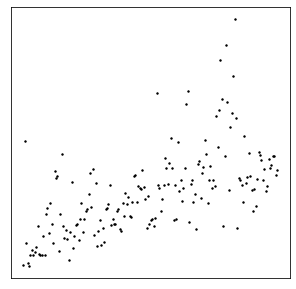

In [19]:
import h5py
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import statsmodels.api as sm

x = np.loadtxt('./data/template_eigenmodes/fsLR_32k_midthickness-lh_emode_200.txt') # (32492, 200)

atlas_path = '/Users/deyingli/Documents/code/Atlas/Q1-Q6_RelatedValidation210.CorticalAreas_dil_Final_Final_Areas_Group_Colors.32k_fs_LR.dlabel.nii'
atlas = nib.load(atlas_path)
atlas_data = atlas.get_fdata()
atlas_data = np.squeeze(atlas_data) #(59412,)
roi_num = 360
y = np.zeros(32492)
y[select_ind_L] = atlas_data[0:29696] -180
y = y[:, np.newaxis]

# remove the medial wall
dirc_L = '/Users/deyingli/Documents/code/Atlas/metric_index_L.txt'
select_ind_L = np.loadtxt( dirc_L ).astype(int)
dirc_R = '/Users/deyingli/Documents/code/Atlas/metric_index_R.txt'
select_ind_R = np.loadtxt( dirc_R ).astype(int)

x = x[select_ind_L,:]
y = y[select_ind_L,:]
print(x.shape, y.shape)

# GLM model
result = np.zeros((y.shape[1], x.shape[1]))
for v in range(x.shape[1]):
    if v==0:
        continue
    if np.sum(x[:,v])==0:
        result[:,v] = result[:,v-1]
    else:
        glm = sm.GLM(x[:,v], y)
        glm_results = glm.fit()
        result[:,v] = glm_results.params

# calculate the accuracy on Glasser Atlas
atlas_path = '/Users/deyingli/Documents/code/Atlas/Q1-Q6_RelatedValidation210.CorticalAreas_dil_Final_Final_Areas_Group_Colors.32k_fs_LR.dlabel.nii'
atlas = nib.load(atlas_path)
atlas_data = atlas.get_fdata()
atlas_data = np.squeeze(atlas_data) #(59412,)
roi_num = 360
atlas_data_L = atlas_data[0:29696] -180
y_atlas = np.squeeze(np.array([np.sum(y[atlas_data_L==(i+1)], axis=0)/len(np.argwhere(atlas_data_L==(i+1))) for i in range(180)]))
_ = np.squeeze(np.dot(x,result.T))
y_pred_atlas = np.squeeze(np.array([np.sum(_[atlas_data_L==(i+1)], axis=0)/len(np.argwhere(atlas_data_L==(i+1))) for i in range(180)]))

# check the results
print(f'the accuracy: {np.corrcoef(y_atlas, y_pred_atlas)[0,1]}')
plt.subplots(figsize = (5, 5))
plt.scatter(y_atlas, y_pred_atlas, c='black', s=2)
plt.xticks([])
plt.yticks([])
plt.show()

# spin test: Glasser

100%|██████████| 1000/1000 [31:09<00:00,  1.87s/it]


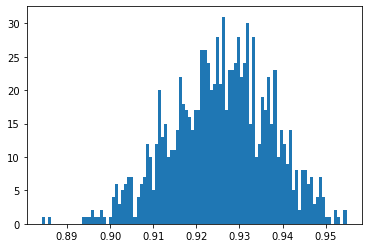

In [21]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from tqdm import tqdm

x = np.loadtxt('./data/template_eigenmodes/fsLR_32k_midthickness-lh_emode_200.txt') # (32492, 200)
y_spin = np.load('./data/spin_test/subject_tfMRI_zstat_spin-lh.npy') # (1000, 32492)

# remove the medial wall
dirc_L = '/Users/deyingli/Documents/code/Atlas/metric_index_L.txt'
select_ind_L = np.loadtxt( dirc_L ).astype(int)
dirc_R = '/Users/deyingli/Documents/code/Atlas/metric_index_R.txt'
select_ind_R = np.loadtxt( dirc_R ).astype(int)

x = x[select_ind_L,:]

corr_re = np.zeros(1000)
for ii in tqdm(range(1000)):
    y = np.squeeze(y_spin[ii,select_ind_L])[:, np.newaxis]
    # GLM model
    result = np.zeros((y.shape[1], x.shape[1]))
    for v in range(x.shape[1]):
        if v==0:
            continue
        if np.sum(x[:,v])==0:
            result[:,v] = result[:,v-1]
        else:
            glm = sm.GLM(x[:,v], y)
            glm_results = glm.fit()
            result[:,v] = glm_results.params

    # check the results
    y_atlas = np.squeeze(np.array([np.sum(y[atlas_data_L==(i+1)], axis=0)/len(np.argwhere(atlas_data_L==(i+1))) for i in range(180)]))
    _ = np.squeeze(np.dot(x,result.T))
    y_pred_atlas = np.squeeze(np.array([np.sum(_[atlas_data_L==(i+1)], axis=0)/len(np.argwhere(atlas_data_L==(i+1))) for i in range(180)]))
    corr_re[ii] = np.corrcoef(y_atlas, y_pred_atlas)[0,1]

np.save('./data/spin_test/spin_Glasser_1000_pearsonr', corr_re)

plt.hist(corr_re, bins=100)
plt.show()

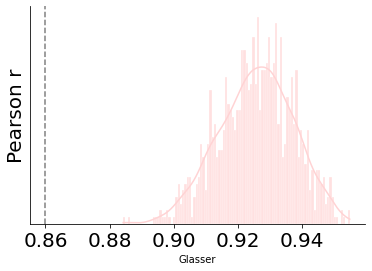

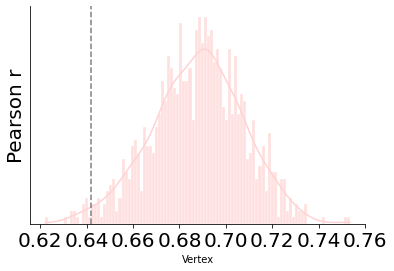

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

y = h5py.File('./data/examples/subject_tfMRI_zstat-lh.mat')
y = np.squeeze(y['zstat'])[:, np.newaxis] # (32492,1)
# from matplotlib import font_manager
# font_manager.fontManager.addfont("/n02dat01/users/lchai/anaconda3/envs/Nm/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/arial.ttf")
# plt.rcParams["font.sans-serif"] = "Arial" 

palette = ['#FFD3D4', '#C0CFFE', '#D6FED3']
corr_re = np.load('./data/spin_test/spin_Glasser_1000_pearsonr.npy')
df = pd.DataFrame({'Glasser':corr_re})
sns.histplot(data=df, x=f'Glasser', bins=100, kde=True,
            color=palette[0], alpha=0.7, edgecolor="white")
sns.despine(top=True, right=True)

plt.axvline(x=0.86, color='grey', linestyle='dashed')

# plt.xlim(-50, 60)
plt.ylabel('Pearson r', fontsize=20)
plt.yticks([])
plt.xticks(fontsize=20)
# plt.xlabel(f'CG{gg+1}-DV', fontsize=20)
# plt.savefig(f'/n02dat01/users/dyli/Grad_code/gene_z_G{gg+1}.png', transparent = True, bbox_inches = 'tight',dpi = 700)
plt.show()

corr_re = np.load('./data/spin_test/spin_1000_pearsonr.npy')
df = pd.DataFrame({'Vertex':corr_re})
sns.histplot(data=df, x=f'Vertex', bins=100, kde=True,
            color=palette[0], alpha=0.7, edgecolor="white")
sns.despine(top=True, right=True)

plt.axvline(x=0.642, color='grey', linestyle='dashed')

# plt.xlim(-50, 60)
plt.ylabel('Pearson r', fontsize=20)
plt.yticks([])
plt.xticks(fontsize=20)
# plt.xlabel(f'CG{gg+1}-DV', fontsize=20)
# plt.savefig(f'/n02dat01/users/dyli/Grad_code/gene_z_G{gg+1}.png', transparent = True, bbox_inches = 'tight',dpi = 700)
plt.show()

# myelin

In [27]:
from nilearn import image, surface, plotting, datasets

list_path = './data/examples/HCPsubj_with_Myelin.txt'
with open( list_path, 'r' ) as f:
    namelist = [ str( line.strip()) for line in f.readlines() ]

myelin = np.zeros(32492)
for sub in namelist:
    data = surface.load_surf_data(f'./data/examples/myelin/{sub}_L.func.gii')
    myelin = myelin + data
np.save('./data/examples/myelin_sum', myelin/len(namelist))

In [10]:
from brainspace.plotting import plot_hemispheres
from brainspace.datasets import load_conte69
from brainspace.mesh.mesh_io import read_surface
import nibabel as nib
import numpy as np
import h5py
from matplotlib.colors import LinearSegmentedColormap

import os
from tqdm import tqdm
import IPython
from IPython.core.display import Image as image
from PIL import Image

surf_lh, surf_rh = load_conte69()
surf_lh2 = read_surface('/Users/deyingli/Documents/code/Grad_2022/data_tmp/support_data/human/S1200.L.midthickness_MSMAll.32k_fs_LR.surf.gii')
surf_rh2 = read_surface('/Users/deyingli/Documents/code/Grad_2022/data_tmp/support_data/human/S1200.R.midthickness_MSMAll.32k_fs_LR.surf.gii')

hroi_L = nib.load('/Users/deyingli/Documents/code/Grad_2022/data_tmp/support_data/100307.L.atlasroi.32k_fs_LR.shape.gii')
index_L = hroi_L.agg_data()
hroi_R = nib.load('/Users/deyingli/Documents/code/Grad_2022/data_tmp/support_data/100307.R.atlasroi.32k_fs_LR.shape.gii')
index_R = hroi_R.agg_data()

myelin = nib.load('./data/examples/S1200.SmoothedMyelinMap_BC_MSMAll.32k_fs_LR.dscalar.nii')
myelin = np.squeeze(myelin.get_data()) # (59412,)
y = np.zeros(32492)
y[index_L !=0] = myelin[0:29696]
y[index_L ==0] = np.nan
data = np.concatenate((y, np.zeros(32492)), axis=0)
data[32492:] = np.nan

obj = plot_hemispheres(surf_lh2, surf_rh2, data, color_bar=True, label_text=['subject_tfMRI_zstat-lh'], nan_color=(0.6,0.6,0.6,1), background=(1,1,1), embed_nb=True, cmap='viridis', transparent_bg=True, size=(2000,500)) # viridis
with open(os.path.join(f'/Users/deyingli/Documents/code/BrainEigenmodes/figures/mylin-yf.png'), 'wb') as png:
    png.write(obj.data)

# haiyan myelin
y = np.load('./data/examples/myelin_sum.npy') # (32492,)
y[index_L==0] = np.nan
data = np.concatenate((y, np.zeros(32492)), axis=0)
data[32492:] = np.nan

obj = plot_hemispheres(surf_lh2, surf_rh2, data, color_bar=True, label_text=['subject_tfMRI_zstat-lh'], nan_color=(0.6,0.6,0.6,1), background=(1,1,1), embed_nb=True, cmap='viridis', transparent_bg=True, size=(2000,500)) # viridis
with open(os.path.join(f'/Users/deyingli/Documents/code/BrainEigenmodes/figures/mylin-haiyan.png'), 'wb') as png:
    png.write(obj.data)

/var/folders/r8/29278rpn46g7v58724jqrkl80000gn/T/ipykernel_22445/532610435.py:25: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  myelin = np.squeeze(myelin.get_data()) # (59412,)
/Users/deyingli/miniconda3/envs/pytorch/lib/python3.8/site-packages/brainspace-0.1.3-py3.8.egg/brainspace/plotting/surface_plotting.py:427: RuntimeWarning: Running plot_hemispheres without a display may result in a crash. For a workaround please consult https://github.com/MICA-MNI/BrainSpace/issues/66. To suppress this warning set suppress_warnings=True.
  warnings.warn(
/Users/deyingli/miniconda3/envs/pytorch/lib/python3.8/site-packages/brainspace-0.1.3-py3.8.egg/brainspace/plotting/utils.py:303: RuntimeWarning: All-NaN axis encountered
  a, b = np.n

/var/folders/r8/29278rpn46g7v58724jqrkl80000gn/T/ipykernel_22445/2985579833.py:12: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  y = np.squeeze(y.get_data())[0:29696, np.newaxis] # (59412,)


(29696, 200) (29696, 1)


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


the accuracy: 0.3546996556372025


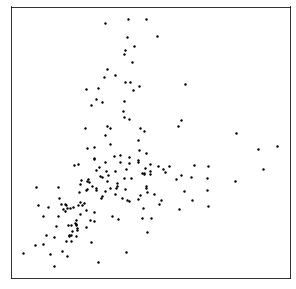

In [13]:
from nilearn import image, surface, plotting, datasets
import h5py
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import statsmodels.api as sm

x = np.loadtxt('./data/template_eigenmodes/fsLR_32k_midthickness-lh_emode_200.txt') # (32492, 200)

# yf
y = nib.load('./data/examples/S1200.SmoothedMyelinMap_BC_MSMAll.32k_fs_LR.dscalar.nii')
y = np.squeeze(y.get_data())[0:29696, np.newaxis] # (59412,)
# haiyan
# y = np.load('./data/examples/myelin_sum.npy') # (32492,)
# y = y[:,np.newaxis]

# remove the medial wall
dirc_L = '/Users/deyingli/Documents/code/Atlas/metric_index_L.txt'
select_ind_L = np.loadtxt( dirc_L ).astype(int)
dirc_R = '/Users/deyingli/Documents/code/Atlas/metric_index_R.txt'
select_ind_R = np.loadtxt( dirc_R ).astype(int)

x = x[select_ind_L,:]
# y = y[select_ind_L,:]
print(x.shape, y.shape)

# GLM model
result = np.zeros((y.shape[1], x.shape[1]))
for v in range(x.shape[1]):
    if v==0:
        continue
    if np.sum(x[:,v])==0:
        result[:,v] = result[:,v-1]
    else:
        glm = sm.GLM(x[:,v], y)
        glm_results = glm.fit()
        result[:,v] = glm_results.params

# calculate the accuracy on Glasser Atlas
atlas_path = '/Users/deyingli/Documents/code/Atlas/Q1-Q6_RelatedValidation210.CorticalAreas_dil_Final_Final_Areas_Group_Colors.32k_fs_LR.dlabel.nii'
atlas = nib.load(atlas_path)
atlas_data = atlas.get_fdata()
atlas_data = np.squeeze(atlas_data) #(59412,)
roi_num = 360
atlas_data_L = atlas_data[0:29696] -180
y_atlas = np.squeeze(np.array([np.sum(y[atlas_data_L==(i+1)], axis=0)/len(np.argwhere(atlas_data_L==(i+1))) for i in range(180)]))
_ = np.squeeze(np.dot(x,result.T))
y_pred_atlas = np.squeeze(np.array([np.sum(_[atlas_data_L==(i+1)], axis=0)/len(np.argwhere(atlas_data_L==(i+1))) for i in range(180)]))

# check the results
print(f'the accuracy: {np.corrcoef(y_atlas, y_pred_atlas)[0,1]}')
plt.subplots(figsize = (5, 5))
plt.scatter(y_atlas, y_pred_atlas, c='black', s=2)
plt.xticks([])
plt.yticks([])
plt.show()

# face

In [30]:
from nilearn import image, surface, plotting, datasets

list_path = './data/examples/HCP_with_EMOTION.txt'
with open( list_path, 'r' ) as f:
    namelist = [ str( line.strip()) for line in f.readlines() ]

myelin = np.zeros(32492)
i=0
for sub in namelist:
    if os.path.exists(f'./data/examples/EMOTION_FACES_s2/{sub}_L.func.gii'):
        data = surface.load_surf_data(f'./data/examples/EMOTION_FACES_s2/{sub}_L.func.gii')
        myelin = myelin + data
    else:
        i +=1
np.save('./data/examples/emotion_face_s2_sum', myelin/(len(namelist)-i))
print(i)

1


(29696, 200) (29696, 1)


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


the accuracy: 0.9455203217074544


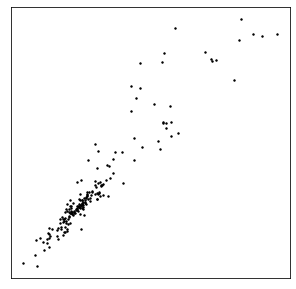

In [31]:
from nilearn import image, surface, plotting, datasets
import h5py
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import statsmodels.api as sm

x = np.loadtxt('./data/template_eigenmodes/fsLR_32k_midthickness-lh_emode_200.txt') # (32492, 200)

y = np.load('./data/examples/emotion_face_s2_sum.npy') # (32492,)
y = y[:,np.newaxis]

# remove the medial wall
dirc_L = '/Users/deyingli/Documents/code/Atlas/metric_index_L.txt'
select_ind_L = np.loadtxt( dirc_L ).astype(int)
dirc_R = '/Users/deyingli/Documents/code/Atlas/metric_index_R.txt'
select_ind_R = np.loadtxt( dirc_R ).astype(int)

x = x[select_ind_L,:]
y = y[select_ind_L,:]
print(x.shape, y.shape)

# GLM model
result = np.zeros((y.shape[1], x.shape[1]))
for v in range(x.shape[1]):
    if v==0:
        continue
    if np.sum(x[:,v])==0:
        result[:,v] = result[:,v-1]
    else:
        glm = sm.GLM(x[:,v], y)
        glm_results = glm.fit()
        result[:,v] = glm_results.params

# calculate the accuracy on Glasser Atlas
atlas_path = '/Users/deyingli/Documents/code/Atlas/Q1-Q6_RelatedValidation210.CorticalAreas_dil_Final_Final_Areas_Group_Colors.32k_fs_LR.dlabel.nii'
atlas = nib.load(atlas_path)
atlas_data = atlas.get_fdata()
atlas_data = np.squeeze(atlas_data) #(59412,)
roi_num = 360
atlas_data_L = atlas_data[0:29696] -180
y_atlas = np.squeeze(np.array([np.sum(y[atlas_data_L==(i+1)], axis=0)/len(np.argwhere(atlas_data_L==(i+1))) for i in range(180)]))
_ = np.squeeze(np.dot(x,result.T))
y_pred_atlas = np.squeeze(np.array([np.sum(_[atlas_data_L==(i+1)], axis=0)/len(np.argwhere(atlas_data_L==(i+1))) for i in range(180)]))

# check the results
print(f'the accuracy: {np.corrcoef(y_atlas, y_pred_atlas)[0,1]}')
plt.subplots(figsize = (5, 5))
plt.scatter(y_atlas, y_pred_atlas, c='black', s=2)
plt.xticks([])
plt.yticks([])
plt.show()

# face: spin test

In [34]:
from brainsmash.mapgen.sampled import Sampled
from brainsmash.mapgen.memmap import txt2memmap

Sur_num = 1000

Sur_father = './data/spin_test'
dist_mat_fin = f'{Sur_father}/LeftDenseGeodesicDistmat.txt'
output_files = txt2memmap(dist_mat_fin, Sur_father, maskfile=None, delimiter=' ')
output_files = {'distmat': f'{Sur_father}/distmat.npy',
                'index': f'{Sur_father}/index.npy'}
# distmat: (32492, 32492) index: (32492, 32492)

# 读取 tfmri map 数据
tfmri_map = np.load('./data/examples/emotion_face_s2_sum.npy')
tfmri_map[select_ind_L] = tfmri_map[select_ind_L]
np.savetxt(f'{Sur_father}/emotion_face_s2_sum.txt', X=tfmri_map, delimiter=' ')

brain_map_file = f'{Sur_father}/emotion_face_s2_sum.txt'
dist_mat_mmap = output_files['distmat']
index_mmap = output_files['index']
sampled = Sampled(brain_map_file, dist_mat_mmap, index_mmap)

surrogates = sampled(n=1000) # (1000, 32492)
np.save(f'{Sur_father}/emotion_face_s2_sum_spin', surrogates)

In [40]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from tqdm import tqdm

x = np.loadtxt('./data/template_eigenmodes/fsLR_32k_midthickness-lh_emode_200.txt') # (32492, 200)
y_spin = np.load('./data/spin_test/emotion_face_s2_sum_spin.npy') # (1000, 32492)

# remove the medial wall
dirc_L = '/Users/deyingli/Documents/code/Atlas/metric_index_L.txt'
select_ind_L = np.loadtxt( dirc_L ).astype(int)
dirc_R = '/Users/deyingli/Documents/code/Atlas/metric_index_R.txt'
select_ind_R = np.loadtxt( dirc_R ).astype(int)

x = x[select_ind_L,:]

corr_re = np.zeros(1000)
for ii in tqdm(range(1000)):
    y = np.squeeze(y_spin[ii,select_ind_L])[:, np.newaxis]
    # GLM model
    result = np.zeros((y.shape[1], x.shape[1]))
    for v in range(x.shape[1]):
        if v==0:
            continue
        if np.sum(x[:,v])==0:
            result[:,v] = result[:,v-1]
        else:
            glm = sm.GLM(x[:,v], y)
            glm_results = glm.fit()
            result[:,v] = glm_results.params

    # check the results
    y_atlas = np.squeeze(np.array([np.sum(y[atlas_data_L==(i+1)], axis=0)/len(np.argwhere(atlas_data_L==(i+1))) for i in range(180)]))
    _ = np.squeeze(np.dot(x,result.T))
    y_pred_atlas = np.squeeze(np.array([np.sum(_[atlas_data_L==(i+1)], axis=0)/len(np.argwhere(atlas_data_L==(i+1))) for i in range(180)]))
    corr_re[ii] = np.corrcoef(y_atlas, y_pred_atlas)[0,1]

np.save('./data/spin_test/emotion_face_s2_sum_spin_Glasser_1000_pearsonr', corr_re)

100%|██████████| 1000/1000 [27:21<00:00,  1.64s/it]


: 

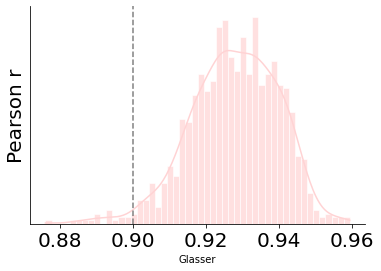

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from matplotlib import font_manager
# font_manager.fontManager.addfont("/n02dat01/users/lchai/anaconda3/envs/Nm/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/arial.ttf")
# plt.rcParams["font.sans-serif"] = "Arial" 

palette = ['#FFD3D4', '#C0CFFE', '#D6FED3']
corr_re = np.load('./data/spin_test/emotion_face_s2_sum_spin_Glasser_1000_pearsonr.npy')
df = pd.DataFrame({'Glasser':corr_re})
sns.histplot(data=df, x=f'Glasser', bins=50, kde=True,
            color=palette[0], alpha=0.7, edgecolor="white")
sns.despine(top=True, right=True)

plt.axvline(x=0.90, color='grey', linestyle='dashed')

# plt.xlim(-50, 60)
plt.ylabel('Pearson r', fontsize=20)
plt.yticks([])
plt.xticks(fontsize=20)
# plt.xlabel(f'CG{gg+1}-DV', fontsize=20)
# plt.savefig(f'/n02dat01/users/dyli/Grad_code/gene_z_G{gg+1}.png', transparent = True, bbox_inches = 'tight',dpi = 700)
plt.show()